#Preparação


In [ ]:
rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
rmdir ~/.kaggle

rmdir: failed to remove '/root/.kaggle': No such file or directory


In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import os
import shutil
from sklearn.utils import resample
from plotly.offline import plot, iplot
from google.colab import files
import cufflinks as cf 
cf.go_offline()
py.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

In [ ]:
!mkdir ~/.kaggle

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

##Pegando os data sets de 2014





In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [ ]:
!kaggle datasets download -d arturbritosouza/fies-para-a-pesquisa

100% 1.72G/1.72G [00:16<00:00, 146MB/s]
100% 1.72G/1.72G [00:16<00:00, 113MB/s]


In [ ]:
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2014.csv" 
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2014.csv" 

Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2014.csv  
Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2014.csv  


#Colocando em datasets para analisar


In [ ]:
fields = [
'SG_UF', 'ST_DEFICIENCIA', 'DS_RACA_COR', 'ST_ENSINO_MEDIO_ESCOLA_PUBLICA', 'DS_TIPO_CURSO', 'DS_CURSO', 'DS_SEXO', 'NO_IES',
'NO_MUNICIPIO', 'NO_AGENTE_FINANCEIRO', 'DS_ESTADO_CIVIL', 'DS_PERIODICIDADE_CUR', 'NU_ANO_PROC', 'NU_MES_PROC' , 'NU_SEMESTRE',
'NU_MES',  'NU_ANO', 'TP_FIANCA', 'VL_REPASSE', 'CO_CONTRATO_FIES', 'VL_PERC_FINANCIAMENTO', 'QT_SEMESTRE_FINANCIADO', 'DT_NASCIMENTO',
'CO_PROCESSO', 'NU_ANO_EXERCICIO_INSC', 'NU_PERCENTUAL_PROUNI', 'NU_PERCENT_SOLICITADO_FINANC', 'VL_MENSALIDADE'
]

In [ ]:
df4 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2014.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)
df13 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2014.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)

In [ ]:
pd.set_option('display.max_columns', 50)
df4

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,3,1,2014,"321,66",F,2014.0,0.0,100.0,3930,8/10/1991 00:00:00,N,S,Feminino,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5
1,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,4,1,2014,"321,66",F,2014.0,0.0,100.0,3930,8/10/1991 00:00:00,N,S,Feminino,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5
2,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,1,1,2014,"321,66",F,2014.0,0.0,100.0,3930,8/10/1991 00:00:00,N,S,Feminino,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5
3,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,2,1,2014,"321,66",F,2014.0,0.0,100.0,3930,8/10/1991 00:00:00,N,S,Feminino,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5
4,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,97,1743810,Caixa Econômica Federal,5,1,2014,"321,66",F,2014.0,0.0,100.0,3930,8/10/1991 00:00:00,N,S,Feminino,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842797,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,4,1,2014,"723,75",N,2014.0,0.0,100.0,"7788,25",2/03/1987 00:00:00,N,N,Feminino,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7
7842798,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,1,1,2014,"723,75",N,2014.0,0.0,100.0,"7788,25",2/03/1987 00:00:00,N,N,Feminino,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7
7842799,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,6,1,2014,"723,75",N,2014.0,0.0,100.0,"7788,25",2/03/1987 00:00:00,N,N,Feminino,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7
7842800,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,5,1,2014,"723,75",N,2014.0,0.0,100.0,"7788,25",2/03/1987 00:00:00,N,N,Feminino,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7


In [ ]:
pd.set_option('display.max_columns', 50)
df13

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,99,1743810,Caixa Econômica Federal,7,2,2014,"333,33",F,2014,0,100,3930,8/10/1991 00:00:00,N,S,Feminino,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,8
1,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,100,1743810,Caixa Econômica Federal,8,2,2014,"333,33",F,2014,0,100,3930,8/10/1991 00:00:00,N,S,Feminino,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,9
2,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,101,1743810,Caixa Econômica Federal,9,2,2014,"333,33",F,2014,0,100,3930,8/10/1991 00:00:00,N,S,Feminino,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,10
3,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,102,1743810,Caixa Econômica Federal,10,2,2014,"333,33",F,2014,0,100,3930,8/10/1991 00:00:00,N,S,Feminino,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,11
4,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,103,1743810,Caixa Econômica Federal,11,2,2014,"333,33",F,2014,0,100,3930,8/10/1991 00:00:00,N,S,Feminino,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271816,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,101,2082646,Banco do Brasil,9,2,2014,"817,83",N,2014,0,100,"26445,57",31/05/1996 00:00:00,N,S,Feminino,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,10
8271817,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,101,2082646,Banco do Brasil,8,2,2014,"817,83",N,2014,0,100,"26445,57",31/05/1996 00:00:00,N,S,Feminino,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,10
8271818,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,102,2082646,Banco do Brasil,10,2,2014,"817,83",N,2014,0,100,"26445,57",31/05/1996 00:00:00,N,S,Feminino,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,11
8271819,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,103,2082646,Banco do Brasil,11,2,2014,"817,83",N,2014,0,100,"26445,57",31/05/1996 00:00:00,N,S,Feminino,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,12


In [ ]:
pd.reset_option("^display")

#Tratamento inicial.

###Crindo uma palheta de cores.

In [ ]:
cores = ['#009739', '#FEDD00', '#012169', '#FFFFFF', '#fe9e00', '#e0fe00', '#00fedd', '#0021fe', '#5e00fe', 
         '#dd00fe',  '#131000', '#898675', '#ffd4de', '#fed78d', '#867589', '#fe0021', '#00a0fe', '#3333ff',
         '#336600', '#660033', '#003a32', '#fe0060', '#260005', '#666699', '#66ff99', '#99ffcc', '#ccff99' ]

##Com os dados de 2014.1

###Retirando as repetições

In [ ]:
repeticoes = df4['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df4['MESES_CONSEDIDOS'] = df4.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df4

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,3,1,2014,"321,66",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5,6
1,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,4,1,2014,"321,66",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5,6
2,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,1,1,2014,"321,66",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5,6
3,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,2,1,2014,"321,66",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5,6
4,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,97,1743810,Caixa Econômica Federal,5,1,2014,"321,66",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842797,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,4,1,2014,"723,75",...,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6
7842798,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,1,1,2014,"723,75",...,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6
7842799,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,6,1,2014,"723,75",...,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6
7842800,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,5,1,2014,"723,75",...,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6


In [ ]:
df4DuplicateRows = df4[df4.duplicated(subset='CO_CONTRATO_FIES')]
df4DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,4,1,2014,"321,66",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5,6
2,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,1,1,2014,"321,66",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5,6
3,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,2,1,2014,"321,66",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5,6
4,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,97,1743810,Caixa Econômica Federal,5,1,2014,"321,66",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,6,6
5,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,98,1743810,Caixa Econômica Federal,6,1,2014,"321,7",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842797,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,4,1,2014,"723,75",...,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6
7842798,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,1,1,2014,"723,75",...,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6
7842799,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,6,1,2014,"723,75",...,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6
7842800,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877731,Banco do Brasil,5,1,2014,"723,75",...,Solteiro,Branco,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6


In [ ]:
df4ComLinhasDuplicads = df4
df4 = df4.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df4

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,96,1743810,Caixa Econômica Federal,3,1,2014,"321,66",...,Solteiro,Pardo,100.0,2.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,5,6
6,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,93,1448904,Caixa Econômica Federal,1,1,2014,"241,66",...,Solteiro,Pardo,100.0,8.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,2,6
12,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,95,1659408,Caixa Econômica Federal,1,1,2014,"271,66",...,Solteiro,Pardo,100.0,6.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,4,6
18,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,94,1516133,Caixa Econômica Federal,1,1,2014,"120,83",...,Solteiro,Amarelo,50.0,8.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,3,6
24,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,94,1510107,Caixa Econômica Federal,2,1,2014,"120,83",...,Solteiro,Pardo,50.0,8.0,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7842772,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1874597,Banco do Brasil,1,1,2014,"717,95",...,Solteiro,Branco,100.0,9.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6
7842778,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877724,Banco do Brasil,6,1,2014,"572,6",...,Solteiro,Pardo,100.0,8.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6
7842784,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1878212,Banco do Brasil,3,1,2014,"723,75",...,NaN,NaN,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6
7842790,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,98,1877727,Banco do Brasil,1,1,2014,"260,55",...,Solteiro,Negro,100.0,10.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,7,6


In [ ]:
df4ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

111828     48
111657     48
112587     48
129673     48
122591     48
           ..
395810      1
1012033     1
963622      1
703201      1
750544      1
Name: CO_CONTRATO_FIES, Length: 1277870, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df4.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.277870e+06,1.277870e+06,1.277870e+06,1.277870e+06,1.277870e+06,1.277865e+06,1.277865e+06,1.277865e+06,1.277865e+06,1.277865e+06,1277870.0,1.277870e+06,1.277870e+06
mean,9.506741e+01,1.135903e+06,2.320690e+00,1.034937e+00,2.013948e+03,2.012943e+03,1.208226e+00,9.300379e+01,9.300379e+01,8.224668e+00,2014.0,4.067407e+00,6.137402e+00
std,1.467556e+00,4.809842e+05,1.893578e+00,1.836205e-01,2.587055e-01,1.031894e+00,7.677481e+00,1.520536e+01,1.520536e+01,2.114343e+00,0.0,1.467556e+00,1.471104e+00
min,9.300000e+01,1.111870e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.001000e+03,0.000000e+00,2.500000e+01,2.500000e+01,1.000000e+00,2014.0,2.000000e+00,1.000000e+00
25%,9.400000e+01,7.514302e+05,1.000000e+00,1.000000e+00,2.014000e+03,2.012000e+03,0.000000e+00,1.000000e+02,1.000000e+02,7.000000e+00,2014.0,3.000000e+00,6.000000e+00
50%,9.500000e+01,1.180114e+06,2.000000e+00,1.000000e+00,2.014000e+03,2.013000e+03,0.000000e+00,1.000000e+02,1.000000e+02,8.000000e+00,2014.0,4.000000e+00,6.000000e+00
75%,9.600000e+01,1.555419e+06,3.000000e+00,1.000000e+00,2.014000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+01,2014.0,5.000000e+00,6.000000e+00
max,9.800000e+01,1.879174e+06,1.200000e+01,2.000000e+00,2.014000e+03,2.014000e+03,5.000000e+01,1.000000e+02,1.000000e+02,2.400000e+01,2014.0,7.000000e+00,4.800000e+01


In [ ]:
df4.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   4418
DS_SEXO                           4397
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    4397
ST_DEFICIENCIA                    4397
DT_NASCIMENTO                     4397
DS_RACA_COR                       4397
DS_PERIODICIDADE_CUR                44
DS_TIPO_CURSO                       44
DS_CURSO                            44
NU_PERCENTUAL_PROUNI                 5
NU_PERCENT_SOLICITADO_FINANC         5
VL_REPASSE                           5
NU_ANO_EXERCICIO_INSC                5
TP_FIANCA                            5
QT_SEMESTRE_FINANCIADO               5
NO_IES                               5
VL_PERC_FINANCIAMENTO                5
NU_ANO_PROC                          0
NU_MES_PROC                          0
SG_UF                                0
NO_MUNICIPIO                         0
VL_MENSALIDADE                       0
NU_ANO                               0
NU_SEMESTRE                          0
NU_MES                               0
NO_AGENTE_FINANCEIRO     

In [ ]:
df4.dropna(axis=0, inplace=True)

In [ ]:
df4.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df4.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.273413e+06,1.273413e+06,1.273413e+06,1.273413e+06,1.273413e+06,1.273413e+06,1.273413e+06,1.273413e+06,1.273413e+06,1.273413e+06,1273413.0,1.273413e+06,1.273413e+06
mean,9.506913e+01,1.135102e+06,2.322389e+00,1.035018e+00,2.013948e+03,2.012941e+03,1.209466e+00,9.299403e+01,9.299403e+01,8.220514e+00,2014.0,4.069135e+00,6.137695e+00
std,1.467383e+00,4.812094e+05,1.894911e+00,1.838246e-01,2.590579e-01,1.032518e+00,7.681321e+00,1.521393e+01,1.521393e+01,2.115730e+00,0.0,1.467383e+00,1.473083e+00
min,9.300000e+01,1.111870e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.001000e+03,0.000000e+00,2.500000e+01,2.500000e+01,1.000000e+00,2014.0,2.000000e+00,1.000000e+00
25%,9.400000e+01,7.499180e+05,1.000000e+00,1.000000e+00,2.014000e+03,2.012000e+03,0.000000e+00,1.000000e+02,1.000000e+02,7.000000e+00,2014.0,3.000000e+00,6.000000e+00
50%,9.500000e+01,1.178742e+06,2.000000e+00,1.000000e+00,2.014000e+03,2.013000e+03,0.000000e+00,1.000000e+02,1.000000e+02,8.000000e+00,2014.0,4.000000e+00,6.000000e+00
75%,9.600000e+01,1.554997e+06,3.000000e+00,1.000000e+00,2.014000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+01,2014.0,5.000000e+00,6.000000e+00
max,9.800000e+01,1.879174e+06,1.200000e+01,2.000000e+00,2.014000e+03,2.014000e+03,5.000000e+01,1.000000e+02,1.000000e+02,2.400000e+01,2014.0,7.000000e+00,4.800000e+01


###Criando a coluna de região, baseado nos estados.

In [ ]:
df4['REGIAO'] = df4['SG_UF']

In [ ]:
df4['REGIAO']= df4['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df4['REGIAO']= df4['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df4['REGIAO']= df4['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df4['REGIAO']= df4['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df4['REGIAO']= df4['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df4['CATEGORIA_CIENCIA_CURSO'] = df4['DS_CURSO']

In [ ]:
df4['CATEGORIA_CIENCIA_CURSO']= df4['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA', 'SERVIÇOS DE TURISMO', 'TURISMO RECEPTIVO', 'GESTÃO EMPRESARIAL',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM RELAÇÕES PÚBLICAS', 'GESTÃO DE SERVIÇOS EXECUTIVOS', 'GESTÃO DE PRODUÇÃO', 'ADMINISTRAÇÃO DE RECURSOS HUMANOS'
], 
'Ciências Sociais Aplicadas')


df4['CATEGORIA_CIENCIA_CURSO']= df4['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA',
'FUTEBOL'
], 
'Ciências da Saúde')


df4['CATEGORIA_CIENCIA_CURSO']= df4['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA', 'TRANSPORTE AÉREO', 'GESTÃO DE REDES DE COMPUTADORES E INTERNET', 'COMPUTAÇÃO CIENTÍFICA', 'MECÂNICA DE PRECISÃO', 'ESTATÍSTICA',
'TELECOMUNICAÇÕES', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS INTERNET', 'COMPUTAÇÃO E INFORMÁTICA', 'DESENVOLVIMENTO DE SISTEMAS DE INFORMAÇÃO',
'PROCESSAMENTO DE DADOS'
], 
'Ciências Exatas e da Terra')

df4['CATEGORIA_CIENCIA_CURSO']= df4['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL', 'ENGENHARIA INDUSTRIAL MADEIREIRA'
], 
'Engenharias')

df4['CATEGORIA_CIENCIA_CURSO']= df4['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS', 'BIOTECNOLOGIA INDUSTRIAL'
], 
'Ciências Biológicas')

df4['CATEGORIA_CIENCIA_CURSO']= df4['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS', 'AGROINDÚSTRIA'
], 
'Ciências Agrárias')

df4['CATEGORIA_CIENCIA_CURSO']= df4['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA', 'PSICOPEDAGOGIA', 'EDUCAÇÃO ESPECIAL', 'AGRIMENSURA'
], 
'Ciências Humanas')

df4['CATEGORIA_CIENCIA_CURSO']= df4['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN', 'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA ESPANHOLA E RESPECTIVAS LITERATURAS',
'MÚSICA - CANTO', 'PRODUÇÃO GRÁFICA', 'LETRAS - TRADUTOR', 'DESIGN DO PRODUTO', 'TRADUTOR EM INGLÊS', 'MÙSICA - REGÊNCIA CORAL', 'PRODUÇÃO TÊXTIL',
'LETRAS - LIBRAS', 'LETRAS - TRADUÇÃO PORTUGUÊS E INGLÊS'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df4['VL_REPASSE'] = df4['VL_REPASSE'].astype('str')
df4['VL_REPASSE'] = df4['VL_REPASSE'].str.replace(',', '.')
df4['VL_REPASSE']  = pd.to_numeric(df4['VL_REPASSE'], errors='coerce')

df4['VL_MENSALIDADE'] = df4['VL_MENSALIDADE'].astype('str')
df4['VL_MENSALIDADE'] = df4['VL_MENSALIDADE'].str.replace(',', '.')
df4['VL_MENSALIDADE']  = pd.to_numeric(df4['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df4['VALOR_SEMESTRE_PAGO'] = np.where(df4['MESES_CONSEDIDOS'] > 6,
                                           df4['VL_MENSALIDADE'] * 6,
                                           df4['VL_MENSALIDADE'] * df4['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informações disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df4['VALOR_ARQUIVO_PAGO'] = df4['VL_MENSALIDADE'] * df4['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df4['MESES_CONSEDIDOS'].value_counts()

6     1214031
12      22993
4        9138
3        8206
5        4506
18       3235
2        2476
1        2044
24       1323
9        1208
7        1123
8        1007
30        610
10        476
36        350
11        166
20        134
14        112
42         83
15         75
13         58
16         32
17         17
48          5
21          2
22          1
29          1
19          1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df4['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df4['VL_REPASSE'] - df4['VALOR_ARQUIVO_PAGO']

In [ ]:
df4["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

 0.000000e+00    20972
 4.000000e-02     2379
 2.000000e-02     1276
-9.094947e-13     1118
-4.547474e-13     1108
                 ...  
 2.585510e+04        1
 5.641920e+03        1
 2.510443e+04        1
 2.134707e+04        1
 3.445750e+03        1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 879253, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

##Com os dados de 2014.2

###Retirando as repetições

In [ ]:
repeticoes = df13['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df13['MESES_CONSEDIDOS'] = df13.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df13

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,99,1743810,Caixa Econômica Federal,7,2,2014,"333,33",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,8,6
1,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,100,1743810,Caixa Econômica Federal,8,2,2014,"333,33",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,9,6
2,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,101,1743810,Caixa Econômica Federal,9,2,2014,"333,33",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,10,6
3,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,102,1743810,Caixa Econômica Federal,10,2,2014,"333,33",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,11,6
4,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,103,1743810,Caixa Econômica Federal,11,2,2014,"333,33",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271816,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,101,2082646,Banco do Brasil,9,2,2014,"817,83",...,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,10,6
8271817,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,101,2082646,Banco do Brasil,8,2,2014,"817,83",...,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,10,6
8271818,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,102,2082646,Banco do Brasil,10,2,2014,"817,83",...,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,11,6
8271819,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,103,2082646,Banco do Brasil,11,2,2014,"817,83",...,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,12,6


In [ ]:
df13DuplicateRows = df13[df13.duplicated(subset='CO_CONTRATO_FIES')]
df13DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,100,1743810,Caixa Econômica Federal,8,2,2014,"333,33",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,9,6
2,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,101,1743810,Caixa Econômica Federal,9,2,2014,"333,33",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,10,6
3,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,102,1743810,Caixa Econômica Federal,10,2,2014,"333,33",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,11,6
4,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,103,1743810,Caixa Econômica Federal,11,2,2014,"333,33",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,12,6
5,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,104,1743810,Caixa Econômica Federal,12,2,2014,"333,35",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2015,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271816,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,101,2082646,Banco do Brasil,9,2,2014,"817,83",...,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,10,6
8271817,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,101,2082646,Banco do Brasil,8,2,2014,"817,83",...,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,10,6
8271818,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,102,2082646,Banco do Brasil,10,2,2014,"817,83",...,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,11,6
8271819,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,103,2082646,Banco do Brasil,11,2,2014,"817,83",...,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,12,6


In [ ]:
df13ComLinhasDuplicads = df13
df13 = df13.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df13

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,99,1743810,Caixa Econômica Federal,7,2,2014,"333,33",...,Solteiro,Pardo,100,2,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,8,6
6,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,101,2052411,Caixa Econômica Federal,8,2,2014,"241,66",...,Solteiro,Pardo,100,8,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,10,6
12,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,101,2045318,Caixa Econômica Federal,9,2,2014,"283,33",...,Solteiro,Pardo,100,5,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,10,6
18,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,99,1516847,Caixa Econômica Federal,7,2,2014,"253,33",...,Solteiro,Pardo,100,8,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,8,6
24,AC,Cruzeiro do Sul,FACULDADE DE DESENVOLVIMENTO SUSTENTÁVEL DE CR...,99,1516836,Caixa Econômica Federal,7,2,2014,"126,66",...,Casado,Pardo,50,8,CIÊNCIAS CONTÁBEIS,Bacharelado,Semestral,2014,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8271791,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,102,2084772,Banco do Brasil,10,2,2014,"817,83",...,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,11,6
8271797,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,101,2025181,Banco do Brasil,8,2,2014,"817,83",...,Solteiro,Branco,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,10,6
8271803,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,103,2127207,Banco do Brasil,11,2,2014,"434,25",...,Solteiro,Negro,50,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,12,6
8271809,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,101,2031827,Banco do Brasil,8,2,2014,"817,83",...,Solteiro,Pardo,100,10,ENGENHARIA CIVIL,Bacharelado,Semestral,2014,10,6


In [ ]:
df13ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

261106     54
120920     48
128710     48
174433     48
277553     42
           ..
845801      1
1893920     1
872252      1
1117631     1
935422      1
Name: CO_CONTRATO_FIES, Length: 1399696, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df13.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.399696e+06,1.399696e+06,1.399696e+06,1.399696e+06,1.399696e+06,1.399696e+06,1.399696e+06,1.399696e+06,1.399696e+06,1.399696e+06,1.399696e+06,1.399696e+06,1.399696e+06
mean,1.005614e+02,1.299211e+06,7.543512e+00,1.941041e+00,2.013993e+03,2.013146e+03,1.175648e+00,9.339812e+01,9.339812e+01,8.238663e+00,2.014024e+03,9.268090e+00,5.909727e+00
std,1.279135e+00,5.496038e+05,1.493900e+00,2.355485e-01,9.582247e-02,9.919116e-01,7.576181e+00,1.481946e+01,1.481946e+01,2.126317e+00,1.544096e-01,1.747154e+00,1.526617e+00
min,9.900000e+01,1.111870e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.007000e+03,0.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,2.014000e+03,1.000000e+00,1.000000e+00
25%,1.000000e+02,8.697448e+05,7.000000e+00,2.000000e+00,2.014000e+03,2.013000e+03,0.000000e+00,1.000000e+02,1.000000e+02,7.000000e+00,2.014000e+03,8.000000e+00,5.000000e+00
50%,1.000000e+02,1.358516e+06,7.000000e+00,2.000000e+00,2.014000e+03,2.013000e+03,0.000000e+00,1.000000e+02,1.000000e+02,8.000000e+00,2.014000e+03,9.000000e+00,6.000000e+00
75%,1.010000e+02,1.777088e+06,8.000000e+00,2.000000e+00,2.014000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+01,2.014000e+03,1.000000e+01,6.000000e+00
max,1.040000e+02,2.152443e+06,1.200000e+01,2.000000e+00,2.014000e+03,2.014000e+03,5.000000e+01,1.000000e+02,1.000000e+02,1.700000e+01,2.015000e+03,1.200000e+01,5.400000e+01


In [ ]:
df13.isnull().sum().sort_values(ascending=False)

DS_ESTADO_CIVIL                   5552
DT_NASCIMENTO                     5528
DS_RACA_COR                       5528
DS_SEXO                           5528
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    5528
ST_DEFICIENCIA                    5528
DS_PERIODICIDADE_CUR                18
DS_TIPO_CURSO                       18
DS_CURSO                            18
SG_UF                                0
NU_MES_PROC                          0
NU_ANO_PROC                          0
QT_SEMESTRE_FINANCIADO               0
VL_PERC_FINANCIAMENTO                0
VL_REPASSE                           0
NO_MUNICIPIO                         0
NU_PERCENT_SOLICITADO_FINANC         0
NU_PERCENTUAL_PROUNI                 0
NU_ANO_EXERCICIO_INSC                0
TP_FIANCA                            0
VL_MENSALIDADE                       0
NU_ANO                               0
NU_SEMESTRE                          0
NU_MES                               0
NO_AGENTE_FINANCEIRO                 0
CO_CONTRATO_FIES         

In [ ]:
df13.dropna(axis=0, inplace=True)

In [ ]:
df13.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df13.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,1.394126e+06,1.394126e+06,1.394126e+06,1.394126e+06,1.394126e+06,1.394126e+06,1.394126e+06,1.394126e+06,1.394126e+06,1.394126e+06,1.394126e+06,1.394126e+06,1.394126e+06
mean,1.005631e+02,1.298389e+06,7.543860e+00,1.940893e+00,2.013993e+03,2.013145e+03,1.176687e+00,9.338739e+01,9.338739e+01,8.234327e+00,2.014024e+03,9.269379e+00,5.909675e+00
std,1.279293e+00,5.499603e+05,1.495346e+00,2.358241e-01,9.599786e-02,9.927942e-01,7.579446e+00,1.482941e+01,1.482941e+01,2.127983e+00,1.545203e-01,1.748119e+00,1.528394e+00
min,9.900000e+01,1.111870e+05,1.000000e+00,1.000000e+00,2.010000e+03,2.007000e+03,0.000000e+00,2.500000e+01,2.500000e+01,0.000000e+00,2.014000e+03,1.000000e+00,1.000000e+00
25%,1.000000e+02,8.683522e+05,7.000000e+00,2.000000e+00,2.014000e+03,2.013000e+03,0.000000e+00,1.000000e+02,1.000000e+02,7.000000e+00,2.014000e+03,8.000000e+00,5.000000e+00
50%,1.000000e+02,1.357388e+06,7.000000e+00,2.000000e+00,2.014000e+03,2.013000e+03,0.000000e+00,1.000000e+02,1.000000e+02,8.000000e+00,2.014000e+03,9.000000e+00,6.000000e+00
75%,1.010000e+02,1.776822e+06,8.000000e+00,2.000000e+00,2.014000e+03,2.014000e+03,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+01,2.014000e+03,1.000000e+01,6.000000e+00
max,1.040000e+02,2.152443e+06,1.200000e+01,2.000000e+00,2.014000e+03,2.014000e+03,5.000000e+01,1.000000e+02,1.000000e+02,1.700000e+01,2.015000e+03,1.200000e+01,5.400000e+01


###Criando a coluna de região, baseado nos estados.

In [ ]:
df13['REGIAO'] = df13['SG_UF']

In [ ]:
df13['REGIAO']= df13['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df13['REGIAO']= df13['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df13['REGIAO']= df13['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df13['REGIAO']= df13['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df13['REGIAO']= df13['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df13['CATEGORIA_CIENCIA_CURSO'] = df13['DS_CURSO']

In [ ]:
df13['CATEGORIA_CIENCIA_CURSO']= df13['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO', 'GESTÃO DE SEGURANÇA PÚBLICA (EXPERIMENTAL)', 'GESTÃO DE SEGURANÇA PÚBLICA',
'RECURSOS HUMANOS', 'SEGURANÇA NO TRÂNSITO', 'QUALIDADE', 'GESTÃO MERCADOLÓGICA', 'SERVIÇOS DE TURISMO', 'TURISMO RECEPTIVO', 'GESTÃO EMPRESARIAL',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM RELAÇÕES PÚBLICAS', 'GESTÃO DE SERVIÇOS EXECUTIVOS', 'GESTÃO DE PRODUÇÃO', 'ADMINISTRAÇÃO DE RECURSOS HUMANOS'
], 
'Ciências Sociais Aplicadas')


df13['CATEGORIA_CIENCIA_CURSO']= df13['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA',
'FUTEBOL'
], 
'Ciências da Saúde')


df13['CATEGORIA_CIENCIA_CURSO']= df13['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE', 'DESENVOLVIMENTO PARA WEB', 'CIÊNCIAS - QUÍMICA',
'ELETRÔNICA', 'TRANSPORTE AÉREO', 'GESTÃO DE REDES DE COMPUTADORES E INTERNET', 'COMPUTAÇÃO CIENTÍFICA', 'MECÂNICA DE PRECISÃO', 'ESTATÍSTICA',
'TELECOMUNICAÇÕES', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS INTERNET', 'COMPUTAÇÃO E INFORMÁTICA', 'DESENVOLVIMENTO DE SISTEMAS DE INFORMAÇÃO',
'PROCESSAMENTO DE DADOS'
], 
'Ciências Exatas e da Terra')

df13['CATEGORIA_CIENCIA_CURSO']= df13['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL', 'ENGENHARIA DE AUTOMAÇÃO EMPRESARIAL', 'ENGENHARIA INDUSTRIAL MADEIREIRA'
], 
'Engenharias')

df13['CATEGORIA_CIENCIA_CURSO']= df13['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS', 'BIOTECNOLOGIA INDUSTRIAL'
], 
'Ciências Biológicas')

df13['CATEGORIA_CIENCIA_CURSO']= df13['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA', 'PROCESSOS AMBIENTAIS', 'SANEAMENTO AMBIENTAL', 'QUÍMICA DE ALIMENTOS', 'AGROINDÚSTRIA'
], 
'Ciências Agrárias')

df13['CATEGORIA_CIENCIA_CURSO']= df13['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO',
'PROGRAMA ESPECIAL DE FORMAÇÃO DE DOCENTE', 'MUSEOLOGIA', 'PSICOPEDAGOGIA', 'EDUCAÇÃO ESPECIAL', 'AGRIMENSURA'
], 
'Ciências Humanas')

df13['CATEGORIA_CIENCIA_CURSO']= df13['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA', 'RADIALISMO', 'ARTES PLÁSTICAS', 'EDUCAÇÃO ARTÍSTICA - ARTES PLÁSTICAS',
'LETRAS - LÍNGUA INGLESA', 'CONSERVAÇÃO E RESTAURO', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA E MÍDIAS DIGITAIS',
'LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'MODA E DESIGN', 'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA ESPANHOLA E RESPECTIVAS LITERATURAS',
'MÚSICA - CANTO', 'PRODUÇÃO GRÁFICA', 'LETRAS - TRADUTOR', 'DESIGN DO PRODUTO', 'TRADUTOR EM INGLÊS', 'MÙSICA - REGÊNCIA CORAL', 'PRODUÇÃO TÊXTIL',
'LETRAS - LIBRAS', 'LETRAS - TRADUÇÃO PORTUGUÊS E INGLÊS'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df13['VL_REPASSE'] = df13['VL_REPASSE'].astype('str')
df13['VL_REPASSE'] = df13['VL_REPASSE'].str.replace(',', '.')
df13['VL_REPASSE']  = pd.to_numeric(df13['VL_REPASSE'], errors='coerce')

df13['VL_MENSALIDADE'] = df13['VL_MENSALIDADE'].astype('str')
df13['VL_MENSALIDADE'] = df13['VL_MENSALIDADE'].str.replace(',', '.')
df13['VL_MENSALIDADE']  = pd.to_numeric(df13['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df13['VALOR_SEMESTRE_PAGO'] = np.where(df13['MESES_CONSEDIDOS'] > 6,
                                           df13['VL_MENSALIDADE'] * 6,
                                           df13['VL_MENSALIDADE'] * df13['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informaç~es disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df13['VALOR_ARQUIVO_PAGO'] = df13['VL_MENSALIDADE'] * df13['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df13['MESES_CONSEDIDOS'].value_counts()

6     835152
5     482857
12     34347
11     25518
4       5524
3       4151
18      2013
2       1665
17       807
24       568
1        377
7        220
23       214
10       197
30       159
8        132
9        113
29        42
36        37
42        10
35         8
16         5
48         3
15         3
41         1
28         1
14         1
54         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df13['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df13['VL_REPASSE'] - df13['VALOR_ARQUIVO_PAGO']

In [ ]:
df13["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

0.00        9047
0.04         922
0.02         519
0.03         471
27435.99     442
            ... 
19798.26       1
17851.26       1
27933.00       1
15718.05       1
21538.59       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 969625, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

#Analises de 2014.1

##Analisando os valores por estado.

In [ ]:
df4.SG_UF.value_counts()

SP    441102
MG    155136
RJ     90383
BA     74801
RS     58457
PR     58126
MT     50432
CE     37732
DF     36521
PE     34281
GO     30831
SC     29195
PB     27094
RN     19588
MA     16211
ES     14439
AM     14404
PI     14312
SE     12028
PA     10144
RO      9657
AC      8724
MS      8388
AP      7955
AL      7004
RR      4280
TO      2188
Name: SG_UF, dtype: int64

In [ ]:
df4_estados_interativo = df4.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df4_estados_interativo.index,
               y=df4_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.savefig("estudantes por estado 2011.1.png")
files.download("estudantes por estado 2011.1.png") 

plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

##Analisando os valores por região

In [ ]:
df4.REGIAO.value_counts()

SUDESTE         701060
NORDESTE        243051
SUL             145778
CENTRO-OESTE    126172
NORTE            57352
Name: REGIAO, dtype: int64

In [ ]:
df4_regiao_interativo = df4.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df4_regiao_interativo.index,
               y=df4_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 379)
df4.DS_CURSO.value_counts()

DIREITO                                     202548
ADMINISTRAÇÃO                                99850
ENGENHARIA CIVIL                             95690
ENFERMAGEM                                   89645
PSICOLOGIA                                   61248
                                             ...  
EDUCAÇÃO ARTÍSTICA - MÚSICA                      1
ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA         1
DESIGN DO PRODUTO                                1
NATUROLOGIA APLICADA                             1
QUÍMICA AMBIENTAL                                1
Name: DS_CURSO, Length: 379, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df4_curso_interativo = df4.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df4_curso_interativo.index,
               y=df4_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df4.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     489572
Ciências da Saúde              316424
Engenharias                    233099
Ciências Humanas               123743
Ciências Exatas e da Terra      45133
Ciências Agrárias               31858
Linguística, Letras e Artes     19187
Ciências Biológicas             14397
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

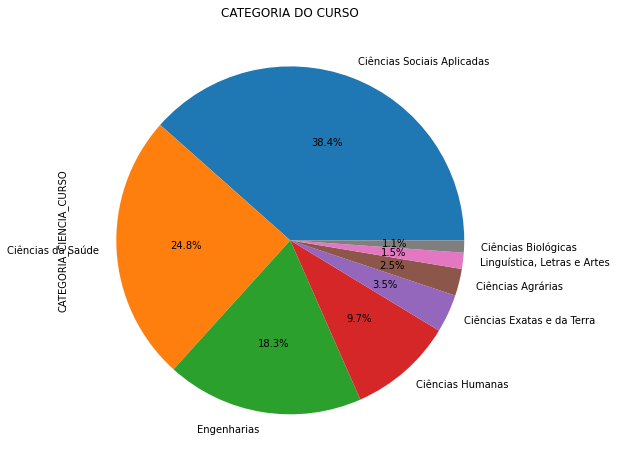

In [ ]:
plot = df4['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df4.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    972403
N    216697
P     84313
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

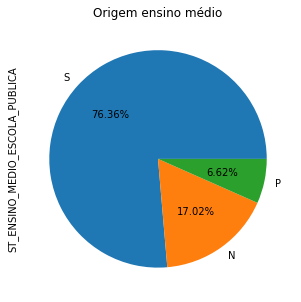

In [ ]:
#pd.set_option('display.float_format', '{:.2%}'.format)
#df4['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True)

plot = df4['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df4.DS_SEXO.value_counts()

Feminino     757339
Masculino    516074
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

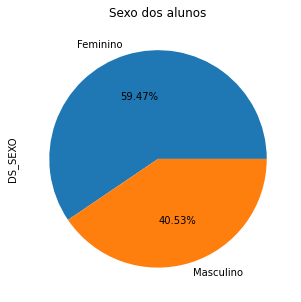

In [ ]:
plot = df4['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1591)
df4.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                                 56190
UNIVERSIDADE ESTÁCIO DE SÁ                            39818
Centro Universitário Estácio do Ceará                 18476
UNIVERSIDADE DE CUIABÁ                                15677
UNIVERSIDADE NOVE DE JULHO                            15234
                                                      ...  
FACULDADE LA SALLE - CAXIAS                               1
FACULDADE XV DE AGOSTO                                    1
FACULDADE DO PLANALTO                                     1
FACULDADE DE ENFERMAGEM LUIZA DE MARILLAC                 1
FACULDADE DE DESENVOLVIMENTO E INTEGRAÇÃO REGIONAL        1
Name: NO_IES, Length: 1591, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 489)
df4.NO_MUNICIPIO.value_counts()

São Paulo                   183944
Valinhos                    137556
Belo Horizonte              103456
Rio de Janeiro               69304
Salvador                     46723
                             ...  
Guaratuba                        1
Santa Cruz do Capibaribe         1
Carangola                        1
Cataguases                       1
Guaraí                           1
Name: NO_MUNICIPIO, Length: 489, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df4.ST_DEFICIENCIA.value_counts()

N    1265742
S       7671
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

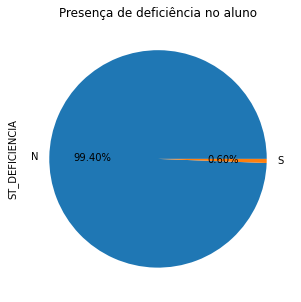

In [ ]:
plot = df4['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df4.DS_RACA_COR.value_counts()

Branco     615110
Pardo      490276
Negro      136676
Amarelo     28516
Índio        2835
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

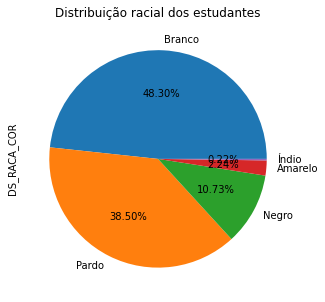

In [ ]:
plot = df4['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df4.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    699920
Banco do Brasil            573493
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

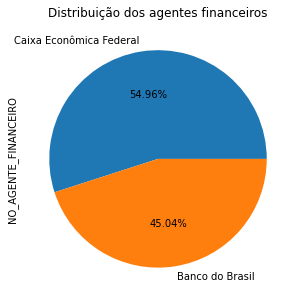

In [ ]:
plot = df4['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df4.DS_ESTADO_CIVIL.value_counts()

Solteiro         1011709
Casado            184119
União estável      34256
Divorciado         30311
Separado           10813
Viúvo               2205
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

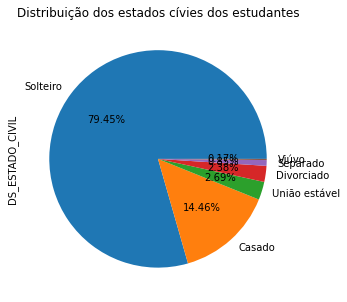

In [ ]:
plot = df4['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df4.DS_PERIODICIDADE_CUR.value_counts()

Semestral     1230115
Anual           42379
Trimestral        919
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

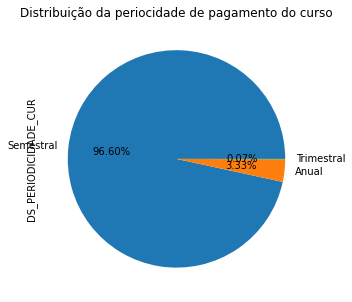

In [ ]:
plot = df4['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")

##Analise da temporalidade dos pagamentos

In [ ]:
df4.NU_ANO_PROC.value_counts()

2014    1273413
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df4ComLinhasDuplicads.NU_MES_PROC.value_counts()

5    1954593
6    1910134
7    1634100
4    1070204
3     996717
2     277054
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

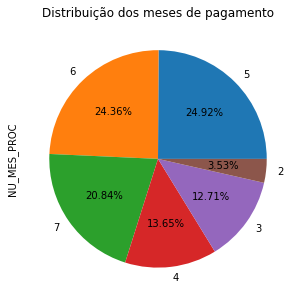

In [ ]:
plot = df4ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df4ComLinhasDuplicads.NU_MES.value_counts()

3     1260830
2     1259108
1     1258912
4     1258519
5     1252320
6     1247755
12      57427
11      55257
10      51191
9       48485
8       46689
7       46309
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

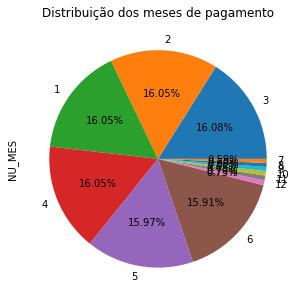

In [ ]:
plot = df4ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df4.NU_SEMESTRE.value_counts()

1    1228821
2      44592
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

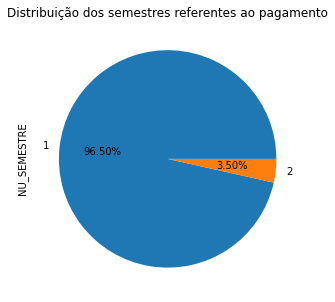

In [ ]:
plot = df4['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df4ComLinhasDuplicads.NU_SEMESTRE.value_counts()

1    7537444
2     305358
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

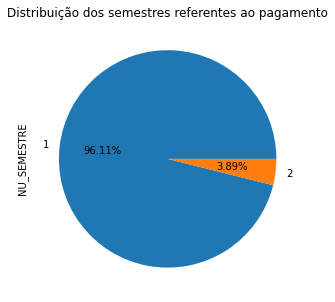

In [ ]:
plot = df4ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df4ComLinhasDuplicads.NU_ANO.value_counts()

2014    7447934
2013     327283
2012      49963
2011      16650
2010        972
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

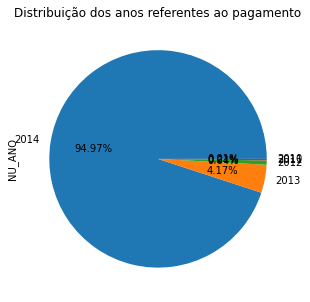

In [ ]:
plot = df4ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df4.TP_FIANCA.value_counts()

F    778905
N    480749
S     13759
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

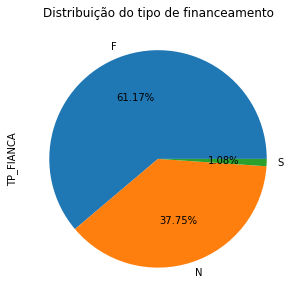

In [ ]:
plot = df4['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df4.DS_TIPO_CURSO.value_counts()

Bacharelado     1081413
Licenciatura     110288
Tecnológico       81698
Sequencial           14
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

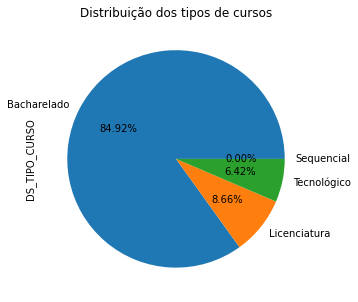

In [ ]:
plot = df4['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df4.CO_PROCESSO.value_counts()

94    380166
96    298985
93    190340
97    171095
95    163591
98     69236
Name: CO_PROCESSO, dtype: int64

In [ ]:
df4.NU_ANO_EXERCICIO_INSC.value_counts()

2013.0    452287
2014.0    449808
2012.0    254679
2011.0     84307
2010.0     28693
2009.0      3312
2008.0       265
2007.0        60
2005.0         1
2001.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df4.NU_PERCENTUAL_PROUNI.value_counts()

0.0     1242602
50.0      30795
25.0         16
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df4.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100.0    1020029
50.0       99568
75.0       94682
70.0       15835
80.0       12841
60.0       12281
90.0        5687
85.0        4454
65.0        3702
95.0        2385
55.0        1947
30.0           1
25.0           1
Name: NU_PERCENT_SOLICITADO_FINANC, dtype: int64

In [ ]:
df4.VL_REPASSE.value_counts()

31619.89    456
6572.45     364
28132.88    345
44233.49    331
31866.38    310
           ... 
23196.40      1
23627.28      1
24709.10      1
12195.90      1
7788.25       1
Name: VL_REPASSE, Length: 870246, dtype: int64

In [ ]:
df4.VL_PERC_FINANCIAMENTO.value_counts()

100.0    1020029
50.0       99568
75.0       94682
70.0       15835
80.0       12841
60.0       12281
90.0        5687
85.0        4454
65.0        3702
95.0        2385
55.0        1947
30.0           1
25.0           1
Name: VL_PERC_FINANCIAMENTO, dtype: int64

In [ ]:
df4.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    479487
8.0     314400
6.0     108453
9.0      84999
7.0      84392
4.0      71982
5.0      52270
12.0     26291
3.0      20312
11.0     15996
2.0      11276
1.0       1649
13.0      1477
16.0       235
14.0       164
15.0        26
17.0         2
18.0         1
24.0         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df4.VL_REPASSE.sum()

40984411171.53999

In [ ]:
df4.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   12811030068.880
MG    5478511567.900
RJ    2857307158.810
RS    2491313552.750
BA    2305448747.620
PR    2138095293.260
MT    1853418738.930
CE    1401196007.320
DF    1133455599.810
SC    1072709177.830
GO    1027455989.070
PB     975241329.920
PE     886565733.930
ES     612252175.920
RN     565988980.290
PI     466630938.640
MA     406330230.530
RO     375717036.160
SE     351890370.910
AM     333825127.650
PA     318990321.370
AC     300739882.400
AP     276913652.960
MS     204893407.780
AL     159246970.820
RR      91252207.060
TO      87990903.020
Name: VL_REPASSE, dtype: float64

In [ ]:
df4_vl_estados_interativo = df4.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df4_vl_estados_interativo.index,
               y=df4_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df4.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        21759100971.510
NORDESTE        7518539309.980
SUL             5702118023.840
CENTRO-OESTE    4219223735.590
NORTE           1785429130.620
Name: VL_REPASSE, dtype: float64

In [ ]:
df4_vl_regiao_interativo = df4.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df4_vl_regiao_interativo.index,
               y=df4_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df4.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             15080721261.150
Ciências Sociais Aplicadas    12423746450.470
Engenharias                    7471088012.860
Ciências Humanas               3086192617.170
Ciências Agrárias              1366508897.720
Ciências Exatas e da Terra      860161140.100
Linguística, Letras e Artes     415828890.340
Ciências Biológicas             280163901.730
Name: VL_REPASSE, dtype: float64

In [ ]:
df4_vl_regiao_interativo = df4.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df4_vl_regiao_interativo.index,
               y=df4_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df4.VALOR_SEMESTRE_PAGO.sum()

6327357729.260003

In [ ]:
df4.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   2068172473.100
MG    822787316.770
RJ    454984906.120
BA    353870780.650
RS    345129956.030
PR    319372420.140
MT    295433911.060
CE    200073352.910
DF    177164317.450
SC    155079029.210
GO    153928189.990
PE    147180375.790
PB    142790067.940
RN     89266189.290
ES     84261908.290
MA     64865951.830
PI     64031047.270
AM     56951480.860
RO     55807244.740
SE     50538283.750
AP     47574725.500
PA     46820121.110
AC     45613764.210
MS     34073296.260
AL     24629641.700
RR     15253108.780
TO     11703868.510
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df4_vl_estados_interativo = df4.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df4_vl_estados_interativo.index,
               y=df4_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df4.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        3430206604.280
NORDESTE       1137245691.130
SUL             819581405.380
CENTRO-OESTE    660599714.760
NORTE           279724313.710
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df4_vl_regiao_interativo = df4.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df4_vl_regiao_interativo.index,
               y=df4_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df4.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             2145796063.000
Ciências Sociais Aplicadas    2016719460.790
Engenharias                   1174817551.210
Ciências Humanas               494100018.860
Ciências Agrárias              209926577.400
Ciências Exatas e da Terra     159813996.220
Linguística, Letras e Artes     76487084.370
Ciências Biológicas             49696977.410
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df4_vl_regiao_interativo = df4.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df4_vl_regiao_interativo.index,
               y=df4_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df4.VALOR_ARQUIVO_PAGO.sum()

6496600699.329997

In [ ]:
df4.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   2116935531.520
MG    846006834.930
RJ    462296718.950
BA    365215723.970
RS    358569688.690
PR    326737675.010
MT    302671523.990
CE    208461889.040
DF    183052125.400
SC    159543907.420
GO    158879814.800
PE    149680314.820
PB    146793774.030
RN     94093525.930
ES     85999586.760
PI     66153768.290
MA     65774350.530
AM     58447347.660
RO     57468816.080
SE     51668724.920
PA     48906795.470
AP     48088450.250
AC     46774926.190
MS     35377084.480
AL     25508163.460
RR     15537350.190
TO     11956286.550
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df4_vl_estados_interativo = df4.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df4_vl_estados_interativo.index,
               y=df4_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df4.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        21759100971.510
NORDESTE        7518539309.980
SUL             5702118023.840
CENTRO-OESTE    4219223735.590
NORTE           1785429130.620
Name: VL_REPASSE, dtype: float64

In [ ]:
df4_vl_regiao_interativo = df4.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df4_vl_regiao_interativo.index,
               y=df4_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df4.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             2206056147.580
Ciências Sociais Aplicadas    2069909276.610
Engenharias                   1204443784.930
Ciências Humanas               507374746.750
Ciências Agrárias              215440124.440
Ciências Exatas e da Terra     163788727.370
Linguística, Letras e Artes     78456926.410
Ciências Biológicas             51130965.240
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df4_vl_regiao_interativo = df4.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df4_vl_regiao_interativo.index,
               y=df4_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

#Analises de 2014.2

##Analisando os valores por estado.

In [ ]:
df13.SG_UF.value_counts()

SP    467318
MG    168136
RJ    103622
BA     81979
RS     65439
PR     59767
MT     53354
CE     44266
DF     42312
PE     37585
GO     35109
SC     32946
PB     29780
RN     19729
MA     19174
AM     18380
ES     17268
PI     16112
SE     14856
PA     13763
RO     10805
AC      9419
MS      9356
AP      9119
AL      7720
RR      4359
TO      2453
Name: SG_UF, dtype: int64

In [ ]:
df13_estados_interativo = df13.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df13_estados_interativo.index,
               y=df13_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.show()

##Analisando os valores por região

In [ ]:
df13.REGIAO.value_counts()

SUDESTE         756344
NORDESTE        271201
SUL             158152
CENTRO-OESTE    140131
NORTE            68298
Name: REGIAO, dtype: int64

In [ ]:
df13_regiao_interativo = df13.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df13_regiao_interativo.index,
               y=df13_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 373)
df13.DS_CURSO.value_counts()

DIREITO                              225317
ENGENHARIA CIVIL                     107465
ADMINISTRAÇÃO                        106308
ENFERMAGEM                            97788
PSICOLOGIA                            69043
                                      ...  
ADMINISTRAÇÃO DE RECURSOS HUMANOS         1
GESTÃO DE SISTEMAS DE INFORMAÇÃO          1
EDUCAÇÃO ARTÍSTICA - MÚSICA               1
LATICÍNIOS                                1
QUÍMICA AMBIENTAL                         1
Name: DS_CURSO, Length: 373, dtype: int64

In [ ]:
pd.reset_option("^display")

In [ ]:
df13_curso_interativo = df13.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df13_curso_interativo.index,
               y=df13_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df13.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     539266
Ciências da Saúde              348687
Engenharias                    254674
Ciências Humanas               135515
Ciências Exatas e da Terra      45706
Ciências Agrárias               35220
Linguística, Letras e Artes     19625
Ciências Biológicas             15433
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

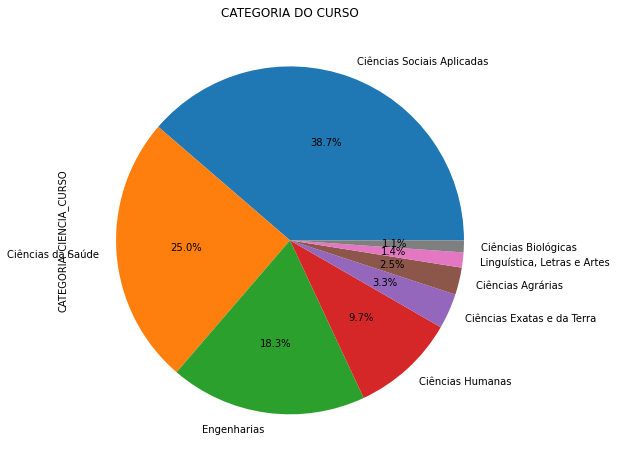

In [ ]:
plot = df13['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df13.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    1061402
N     240080
P      92644
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

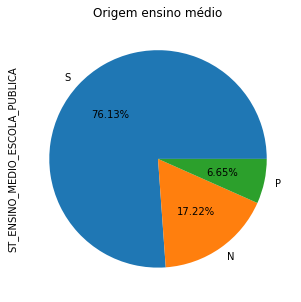

In [ ]:
plot = df13['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df13.DS_SEXO.value_counts()

Feminino     831158
Masculino    562968
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

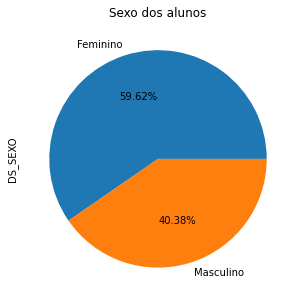

In [ ]:
plot = df13['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1632)
df13.NO_IES.value_counts()

UNIVERSIDADE PAULISTA                       62891
UNIVERSIDADE ESTÁCIO DE SÁ                  44762
Centro Universitário Estácio do Ceará       19536
UNIVERSIDADE NOVE DE JULHO                  17009
UNIVERSIDADE DE CUIABÁ                      16084
                                            ...  
FACULDADE MAURÍCIO DE NASSAU DE SÃO LUÍS        1
Faculdade de Tecnologia do Ipê                  1
FACULDADE DE TECNOLOGIA DE CATALÃO              1
FACULDADE DE ADMINISTRAÇÃO DE ASSIS             1
FACULDADE ÚNICA DE TIMÓTEO                      1
Name: NO_IES, Length: 1632, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 497)
df13.NO_MUNICIPIO.value_counts()

São Paulo               209604
Valinhos                141847
Belo Horizonte          111408
Rio de Janeiro           77404
Salvador                 50455
                         ...  
Itabuna                      1
Canoinhas                    1
Vilhena                      1
São Lourenço da Mata         1
Paranaguá                    1
Name: NO_MUNICIPIO, Length: 497, dtype: int64

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df13.ST_DEFICIENCIA.value_counts()

N    1385944
S       8182
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

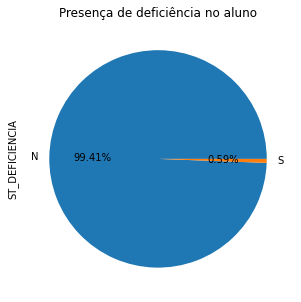

In [ ]:
plot = df13['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df13.DS_RACA_COR.value_counts()

Branco     663968
Pardo      544648
Negro      150732
Amarelo     31628
Índio        3150
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

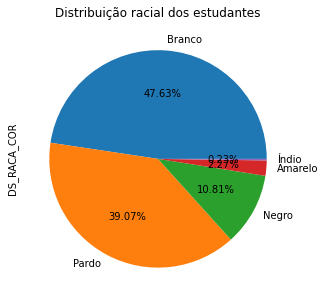

In [ ]:
plot = df13['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df13.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    778600
Banco do Brasil            615526
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

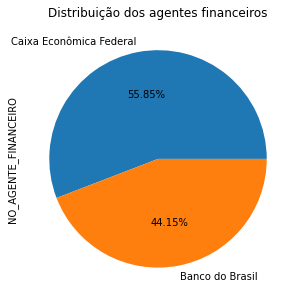

In [ ]:
plot = df13['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df13.DS_ESTADO_CIVIL.value_counts()

Solteiro         1107917
Casado            201064
União estável      37475
Divorciado         33658
Separado           11600
Viúvo               2412
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

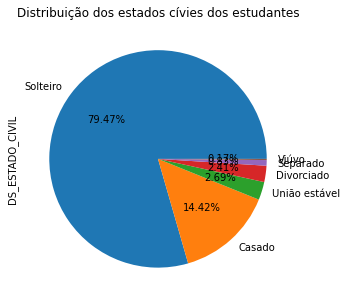

In [ ]:
plot = df13['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df13.DS_PERIODICIDADE_CUR.value_counts()

Semestral     1351313
Anual           41712
Trimestral       1101
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

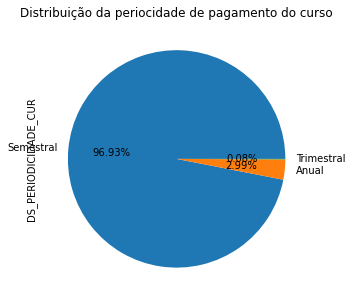

In [ ]:
plot = df13['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")




























##Analise da temporalidade dos pagamentos

In [ ]:
df13.NU_ANO_PROC.value_counts()

2014    1360004
2015      34122
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df13ComLinhasDuplicads.NU_MES_PROC.value_counts()

10    1902868
11    1868256
12    1687173
9     1195250
1     1045729
8      572545
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

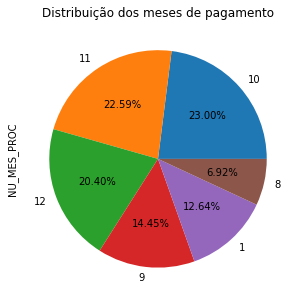

In [ ]:
plot = df13ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df13ComLinhasDuplicads.NU_MES.value_counts()

7     1378659
8     1378596
9     1377374
10    1373226
11    1367495
12     856665
6       90895
5       90442
4       89767
3       89568
1       89567
2       89567
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

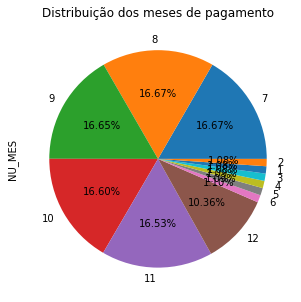

In [ ]:
plot = df13ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df13.NU_SEMESTRE.value_counts()

2    1311724
1      82402
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

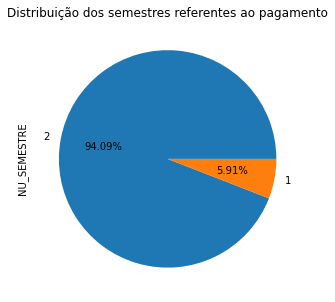

In [ ]:
plot = df13['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df13ComLinhasDuplicads.NU_SEMESTRE.value_counts()

2    7732015
1     539806
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

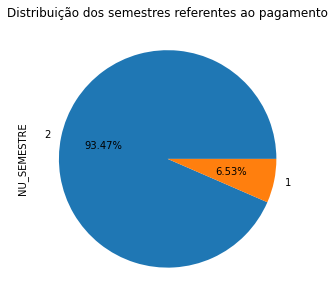

In [ ]:
plot = df13ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df13ComLinhasDuplicads.NU_ANO.value_counts()

2014    8194704
2013      68548
2012       7249
2011       1176
2010        144
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

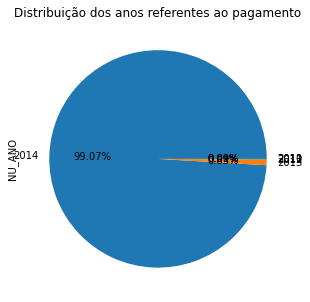

In [ ]:
plot = df13ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df13.TP_FIANCA.value_counts()

F    888220
N    491887
S     14019
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

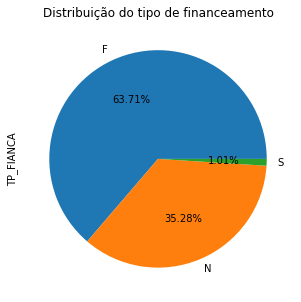

In [ ]:
plot = df13['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df13.DS_TIPO_CURSO.value_counts()

Bacharelado     1190506
Licenciatura     115995
Tecnológico       87616
Sequencial            9
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

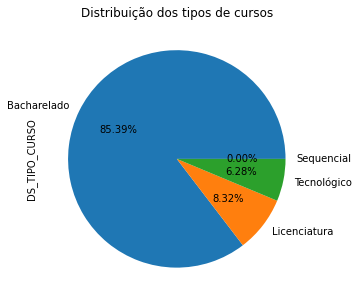

In [ ]:
plot = df13['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df13.CO_PROCESSO.value_counts()

101    380123
100    375264
99     340272
102    184362
103     79983
104     34122
Name: CO_PROCESSO, dtype: int64

In [ ]:
df13.NU_ANO_EXERCICIO_INSC.value_counts()

2014    650614
2013    418080
2012    227776
2011     73753
2010     21985
2009      1806
2008        86
2007        26
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df13.NU_PERCENTUAL_PROUNI.value_counts()

0     1361315
50      32807
25          4
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df13.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100    1130814
50      102009
75      101298
70       16055
80       13152
60       12051
90        6005
85        4514
65        3731
95        2539
55        1957
25           1
Name: NU_PERCENT_SOLICITADO_FINANC, dtype: int64

In [ ]:
df13.VL_REPASSE.value_counts()

31619.89    445
5040.00     357
28132.88    346
44233.49    331
31866.38    309
           ... 
16451.98      1
17776.21      1
7577.96       1
14543.82      1
13679.94      1
Name: VL_REPASSE, Length: 935480, dtype: int64

In [ ]:
df13.VL_PERC_FINANCIAMENTO.value_counts()

100    1130814
50      102009
75      101298
70       16055
80       13152
60       12051
90        6005
85        4514
65        3731
95        2539
55        1957
25           1
Name: VL_PERC_FINANCIAMENTO, dtype: int64

In [ ]:
df13.QT_SEMESTRE_FINANCIADO.value_counts()

10    522786
8     333173
6     111035
9     101090
7      97424
4      76538
5      60279
12     29887
3      24424
11     20834
2      11751
1       2339
13      2161
16       182
14       163
15        45
0         14
17         1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df13.VL_REPASSE.sum()

44978732899.109985

In [ ]:
df13.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   13755646120.540
MG    6002135049.900
RJ    3204661059.590
RS    2783537101.850
BA    2526814469.270
PR    2221890036.950
MT    1996662177.040
CE    1599141847.910
DF    1333844789.620
SC    1211832734.080
GO    1150080880.400
PB    1074165252.720
PE     966912416.860
ES     693442494.830
RN     578550469.910
PI     507184841.800
MA     476877946.060
SE     431388551.040
PA     413779906.040
RO     407328336.310
AM     399209362.950
AC     324822614.260
AP     309852689.940
MS     233592415.830
AL     182718260.820
TO      97295830.410
RR      95365242.180
Name: VL_REPASSE, dtype: float64

In [ ]:
df13_vl_estados_interativo = df13.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df13_vl_estados_interativo.index,
               y=df13_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df13.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        23655884724.860
NORDESTE        8343754056.390
SUL             6217259872.880
CENTRO-OESTE    4714180262.890
NORTE           2047653982.090
Name: VL_REPASSE, dtype: float64

In [ ]:
df13_vl_regiao_interativo = df13.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df13_vl_regiao_interativo.index,
               y=df13_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df13.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             16491058131.770
Ciências Sociais Aplicadas    13731977261.740
Engenharias                    8245441251.790
Ciências Humanas               3359853139.620
Ciências Agrárias              1521325860.200
Ciências Exatas e da Terra      893557056.460
Linguística, Letras e Artes     431062172.950
Ciências Biológicas             304458024.580
Name: VL_REPASSE, dtype: float64

In [ ]:
df13_vl_regiao_interativo = df13.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df13_vl_regiao_interativo.index,
               y=df13_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df13.VALOR_SEMESTRE_PAGO.sum()

6700543541.609999

In [ ]:
df13.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   2082764362.390
MG    861957078.770
RJ    489659208.160
RS    395079784.340
BA    367641105.980
PR    328759859.340
MT    292811585.880
CE    233691440.990
DF    209070868.490
SC    177772142.550
GO    175869968.090
PB    158946376.730
PE    146775146.580
ES    100376392.420
RN     80309999.340
MA     77366016.850
PI     69740773.150
AM     68504179.440
SE     66273329.700
PA     64940754.290
RO     62835607.890
AC     49266891.120
AP     47754335.500
MS     37423651.710
AL     27468329.310
RR     14723325.380
TO     12761027.220
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df13_vl_estados_interativo = df13.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df13_vl_estados_interativo.index,
               y=df13_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df13.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        3534757041.740
NORDESTE       1228212518.630
SUL             901611786.230
CENTRO-OESTE    715176074.170
NORTE           320786120.840
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df13_vl_regiao_interativo = df13.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df13_vl_regiao_interativo.index,
               y=df13_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df13.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             2327591925.980
Ciências Sociais Aplicadas    2125432098.310
Engenharias                   1237083656.030
Ciências Humanas               501235718.490
Ciências Agrárias              229783642.230
Ciências Exatas e da Terra     155763260.910
Linguística, Letras e Artes     71751195.370
Ciências Biológicas             51902044.290
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df13_vl_regiao_interativo = df13.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df13_vl_regiao_interativo.index,
               y=df13_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df13.VALOR_ARQUIVO_PAGO.sum()

6995953177.97

In [ ]:
df13.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   2183707273.300
MG    892900035.710
RJ    508537080.330
RS    414745458.530
BA    381929711.610
PR    343160232.600
MT    300339816.660
CE    244977938.650
DF    220396574.920
SC    188021664.250
GO    186238881.640
PB    166283545.990
PE    153129634.870
ES    104199266.290
RN     84070600.960
MA     78870796.230
PI     72735561.700
AM     71194275.150
PA     69341989.810
SE     68055125.090
RO     64506838.360
AC     50558580.600
AP     48851482.200
MS     41545702.570
AL     28858866.930
RR     15227449.080
TO     13568793.940
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df13_vl_estados_interativo = df13.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df13_vl_estados_interativo.index,
               y=df13_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df13.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        3689343655.630
NORDESTE       1278911782.030
SUL             945927355.380
CENTRO-OESTE    748520975.790
NORTE           333249409.140
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df13_vl_regiao_interativo = df13.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df13_vl_regiao_interativo.index,
               y=df13_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df13.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             2417086264.120
Ciências Sociais Aplicadas    2228989704.580
Engenharias                   1290894704.620
Ciências Humanas               526504994.840
Ciências Agrárias              239528355.900
Ciências Exatas e da Terra     162650674.580
Linguística, Letras e Artes     75725205.130
Ciências Biológicas             54573274.200
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df13_vl_regiao_interativo = df13.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df13_vl_regiao_interativo.index,
               y=df13_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")